### Settings

In [125]:
import pandas as pd
%matplotlib inline
data_folder = 'data/'

motor_filename =  data_folder + 'annual_motor_vehicle.csv'
hdb_flat_filename = data_folder + 'records-of-hdb-flat-resale-transactions-closed-by-salespersons.csv'
wireless_sg_filename = data_folder + 'wireless-hotspots-geojson.geojson'

### Question 1

In [126]:
df = pd.read_csv(motor_filename)
df.head()

,year,type,age,number_reported,number_passed,passing_rate
0,2006,Cars,1,455,432,94.9
1,2006,Cars,2,1082,1026,94.8
2,2006,Cars,3,73558,68432,93.0
3,2006,Cars,4,627,560,89.3
4,2006,Cars,5,17963,16716,93.1


#### Background Data Exploration

In [127]:
df['type'].value_counts()

Other Buses               132
Motorcycles               132
Scheduled Buses           132
Goods & Other Vehicles    132
Cars                      132
Taxis                     132
Name: type, dtype: int64

In [128]:
df.describe()

,year,number_reported,number_passed,passing_rate
count,792.000000,792.000000,792.000000,792.000000
mean,2011.500000,9338.531566,8480.472222,85.640487
std,3.454234,17196.427270,15508.869146,23.781986
min,2006.000000,0.000000,0.000000,0.000000
25%,2008.750000,434.000000,418.250000,85.452967
50%,2011.500000,4665.500000,4299.000000,92.500000
75%,2014.250000,10870.000000,9970.500000,96.977437
max,2017.000000,116702.000000,109209.000000,100.000000


#### Task 1.1: What's the average passing rate on first inspection each year, taking into account motorcycles of all age groups?

Assuming 'mean' for average as its continuous

In [129]:
subset_df = df[df['type'] == 'Motorcycles']
subset_df.head()

,year,type,age,number_reported,number_passed,passing_rate
11,2006,Motorcycles,1,343,329,95.9
12,2006,Motorcycles,2,577,541,93.8
13,2006,Motorcycles,3,16235,15066,92.8
14,2006,Motorcycles,4,15695,14686,93.6
15,2006,Motorcycles,5,12434,11456,92.1


In [130]:
task_11_answer = subset_df.groupby(['year','age']).mean().round(2)['passing_rate']
task_11_answer

year  age
2006  1      95.90
      10     92.50
      2      93.80
      3      92.80
      4      93.60
             ...  
2017  6      96.15
      7      96.63
      8      96.29
      9      95.64
      >10    95.51
Name: passing_rate, Length: 132, dtype: float64

In [131]:
# reorder dataframe to make it easier to view. 
# ANS: Table of average passing age on first inspection for every age group for motocycles only

col_order = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10','>10']
task_11_unstacked = task_11_answer.unstack(level=0).T[col_order]
task_11_unstacked

age,1,2,3,4,5,6,7,8,9,10,>10
year,,,,,,,,,,,
2006,95.90,93.80,92.80,93.60,92.10,92.40,92.70,92.50,93.00,92.50,91.60
2007,94.79,95.08,93.95,94.10,94.14,93.29,92.53,93.08,93.76,93.00,92.82
2008,95.06,95.31,94.01,94.42,94.22,94.47,93.09,92.88,93.07,93.11,92.93
2009,96.91,93.83,91.63,94.53,94.24,94.25,94.76,93.36,93.14,92.74,93.22
2010,95.65,95.16,90.74,92.44,94.55,94.38,94.70,94.17,93.83,94.45,93.73
2011,96.67,91.84,92.77,92.52,93.50,94.57,94.38,94.51,94.62,94.87,94.25
2012,94.05,90.48,91.46,92.12,91.76,93.20,93.39,93.51,93.99,93.77,92.98
2013,92.45,87.60,88.99,88.96,88.48,87.26,89.11,89.63,89.56,90.05,87.44
2014,0.00,92.15,92.94,92.55,91.97,91.59,89.88,91.30,91.82,91.35,88.73


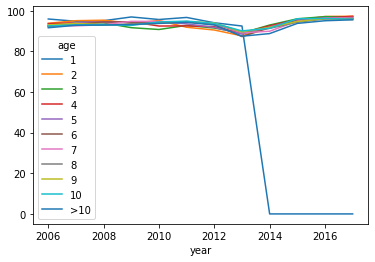

In [132]:
# graph view - you can see generally passing rates improve over the last few years, with dip in 2013,
#              and no data for inspections in the first year?
task_11_unstacked.plot()

#### Task 1.2: For motorcycles of each age, estimate their passing rate next year
There are many different methods here.

Method 1: Naive Estimate: 
 - 1(a): take the mean across all years
     - However, this is not fair --> doesnt account for increased reliability over the years. For example, 2014 on, big increase in passing rates (see exploration below)
 - 1(b): Use latest n years only.

In [133]:
# Exploration: verify numbers reported are okay - no motorcycles 1 year old for 2015-2017!
subset_df[subset_df['year'] == 2017]

,year,type,age,number_reported,number_passed,passing_rate
737,2017,Motorcycles,1,0,0,0.000000
738,2017,Motorcycles,2,5251,5107,97.257665
739,2017,Motorcycles,3,10329,10015,96.960015
740,2017,Motorcycles,4,10084,9806,97.243157
741,2017,Motorcycles,5,8048,7743,96.210239
742,2017,Motorcycles,6,7552,7261,96.146716
743,2017,Motorcycles,7,7779,7517,96.631958
744,2017,Motorcycles,8,8268,7961,96.286889
745,2017,Motorcycles,9,7250,6934,95.641379
746,2017,Motorcycles,10,5343,5117,95.770167


In [134]:
# observe that 2014 onwards theres significant improvements over the years, particularly in 2015 onwards
task_11_unstacked.diff(axis=1)

age,1,2,3,4,5,6,7,8,9,10,>10
year,,,,,,,,,,,
2006,NaN,-2.10,-1.00,0.80,-1.50,0.30,0.30,-0.20,0.50,-0.50,-0.90
2007,NaN,0.29,-1.13,0.15,0.04,-0.85,-0.76,0.55,0.68,-0.76,-0.18
2008,NaN,0.25,-1.30,0.41,-0.20,0.25,-1.38,-0.21,0.19,0.04,-0.18
2009,NaN,-3.08,-2.20,2.90,-0.29,0.01,0.51,-1.40,-0.22,-0.40,0.48
2010,NaN,-0.49,-4.42,1.70,2.11,-0.17,0.32,-0.53,-0.34,0.62,-0.72
2011,NaN,-4.83,0.93,-0.25,0.98,1.07,-0.19,0.13,0.11,0.25,-0.62
2012,NaN,-3.57,0.98,0.66,-0.36,1.44,0.19,0.12,0.48,-0.22,-0.79
2013,NaN,-4.85,1.39,-0.03,-0.48,-1.22,1.85,0.52,-0.07,0.49,-2.61
2014,NaN,92.15,0.79,-0.39,-0.58,-0.38,-1.71,1.42,0.52,-0.47,-2.62


In [135]:
# Method 1a: mean across all years
task_12_methoda = pd.DataFrame(task_11_unstacked.mean(axis=0)).T
task_12_methoda.index.name='Mean Passing Rates'
task_12_methoda

age,1,2,3,4,5,6,7,8,9,10,>10
Mean Passing Rates,,,,,,,,,,,
0,63.456667,93.7475,93.276667,93.699167,93.586667,93.563333,93.520833,93.458333,93.599167,93.6525,92.666667


In [136]:
# Method 1b: use last n years only for recency weighted.


n = 3 # default: 2015 onwards

def compute_for_last_n(df,agg_func_name,n):
    # find idx of last nonzero
    output = []
    for col in df.columns:
        valid_idx = df[df[col]!=0].index
        col_up_to_last_valid_idx = df[col][valid_idx]
        res = col_up_to_last_valid_idx.tail(n).agg(agg_func_name)
        output.append([col,res])
    return output

compute_for_last_n(task_11_unstacked,'mean',3)

[['1', 94.39],
 ['2', 96.57333333333332],
 ['3', 96.67666666666666],
 ['4', 96.38333333333333],
 ['5', 96.02666666666666],
 ['6', 95.78333333333335],
 ['7', 95.90333333333332],
 ['8', 95.52],
 ['9', 95.46666666666665],
 ['10', 95.99666666666667],
 ['>10', 94.76666666666667]]

### Question 2

In [137]:
DATE_COL = 'complete_date_txt'
df = pd.read_csv(hdb_flat_filename,parse_dates=[DATE_COL])
df.head()

,complete_date_txt,town_txt,represented,salesperson_name,salesperson_reg_no
0,2017-01-01,JURONG WEST,Buyer,DERRICK YEO CHUN MENG,R018231E
1,2017-01-01,BUKIT MERAH,Buyer,LIM HOCK LEONG (LIN FULONG),R027276D
2,2017-01-01,CENTRAL AREA,Buyer,LAWRENCE TAN CHOON KIAT (CHEN JUNJIE),R006416I
3,2017-01-01,PUNGGOL,Buyer,LIM KIM HENG,R018637Z
4,2017-01-01,PASIR RIS,Buyer,ONG SHU LING,R024367E


In [138]:
# Find minmax date range
print("Min date: {}\nMax date: {}".format(min(df[DATE_COL]),max(df[DATE_COL])))

Min date: 2017-01-01 00:00:00
Max date: 2020-03-01 00:00:00


In [139]:
# add year
df['year'] = df[DATE_COL].apply(lambda x: x.year)

# focus on seller
df = df[df['represented'] == 'Seller']

#### Task 2.1: Based on the dataset, how many sales would you expect an agent to close each year? How much variation is there among agents?

In [140]:
# obtain sales per year df
grpby = df.groupby(['year','salesperson_reg_no']).count()[DATE_COL]
grpby = grpby.unstack(level=0)
grpby.head()

year,2017,2018,2019,2020
salesperson_reg_no,,,,
P000001B,NaN,1.0,1.0,NaN
P000003I,2.0,3.0,2.0,NaN
P000008Z,1.0,NaN,4.0,NaN
P000017I,NaN,1.0,NaN,NaN
P000020I,2.0,4.0,2.0,1.0


In [141]:
# overall a year
grpby.mean(axis=0)

year
2017    2.805869
2018    3.052879
2019    2.860430
2020    1.569658
dtype: float64

In [142]:
grpby.var(axis=0)

year
2017    20.699873
2018    28.539083
2019    21.935382
2020     2.439830
dtype: float64

#### Task 2.2: Examine the distribution for number of sales closed by an agent in a year & suggest a probability distribution that may be suitable for modelling this set of values. What are some ways in which your suggested distribution is appropriate? What are some of its limitations?

Sales is a *discrete* variable. You can't have half a sale. Normally, sales is modelled with a poisson distribution.

Poisson assumptions

1. Any successful event should not influence the outcome of another successful event.
2. The probability of success over a short interval must equal the probability of success over a longer interval.
3. The probability of success in an interval approaches zero as the interval becomes smaller.

These might not hold true in the case of HDB sales

However, also modeled with negative binomial (if people start hoarding, aka COVID-19) and poisson regression if theres promotions, seasonality etc.

In [143]:
grpby

year,2017,2018,2019,2020
salesperson_reg_no,,,,
P000001B,NaN,1.0,1.0,NaN
P000003I,2.0,3.0,2.0,NaN
P000008Z,1.0,NaN,4.0,NaN
P000017I,NaN,1.0,NaN,NaN
P000020I,2.0,4.0,2.0,1.0
...,...,...,...,...
R061741I,NaN,NaN,NaN,1.0
R061748F,NaN,NaN,NaN,1.0
R061753B,NaN,NaN,NaN,1.0


#### Task 3: Property agents tend to specialise in one or more specific geographical areas, rather than ply their trade equally island-wide. Given a property agent who has closed sales in Sembawang and Yishun during a given year, which other town is he/she most likely to be active in that year? (Note: you may wish to use association rules for this task.)

In [144]:
year = 2019
grpby_half = df[df['year'] == year].groupby(['salesperson_reg_no'])['town_txt']
dataset = grpby_half.agg(lambda x: list(set(';'.join(x).split(';'))))
# dataset = grpby_half.agg(lambda x: ';'.join(x))
dataset

salesperson_reg_no
P000001B                                 [QUEENSTOWN]
P000003I                        [BUKIT MERAH, YISHUN]
P000008Z    [TOA PAYOH, YISHUN, SERANGOON, SEMBAWANG]
P000020I                          [YISHUN, WOODLANDS]
P000027F                                   [SENGKANG]
                              ...                    
R061385E                     [BUKIT BATOK, WOODLANDS]
R061395B                                    [HOUGANG]
R061586F                                   [SENGKANG]
R061720F                              [CHOA CHU KANG]
R061731A                                    [PUNGGOL]
Name: town_txt, Length: 6692, dtype: object

In [145]:
# mask = (dataset.str.contains('SEMBAWANG')) & (dataset.str.contains('YISHUN'))
# relavent_rows = dataset[mask]

# support = len(relavent_rows) / len(dataset)
# confidence 

In [146]:
df_temp

,ANG MO KIO,BEDOK,BISHAN,BUKIT BATOK,BUKIT MERAH,BUKIT PANJANG,BUKIT TIMAH,CENTRAL AREA,CHOA CHU KANG,CLEMENTI,...,PASIR RIS,PUNGGOL,QUEENSTOWN,SEMBAWANG,SENGKANG,SERANGOON,TAMPINES,TOA PAYOH,WOODLANDS,YISHUN
0,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
1,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,True,False,True,False,True
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,True
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6687,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
6688,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6689,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
6690,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False


In [147]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import association_rules, apriori

sparse = False

assoc_dataset = dataset.to_list()
te = TransactionEncoder()

if not sparse:
    te_ary = te.fit(assoc_dataset).transform(assoc_dataset)
    df_temp = pd.DataFrame(te_ary, columns=te.columns_)
else:
    oht_ary = te.fit(assoc_dataset).transform(assoc_dataset, sparse=True)
    df_temp = pd.DataFrame.sparse.from_spmatrix(oht_ary, columns=te.columns_)
    
frequent_itemsets = apriori(df_temp, min_support=0.001,use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.100120,(ANG MO KIO)
1,0.104603,(BEDOK)
2,0.043933,(BISHAN)
3,0.094292,(BUKIT BATOK)
4,0.093246,(BUKIT MERAH)
...,...,...
12723,0.001046,"(YISHUN, PASIR RIS, JURONG WEST, SENGKANG, BED..."
12724,0.001046,"(YISHUN, JURONG WEST, CHOA CHU KANG, SENGKANG,..."
12725,0.001195,"(YISHUN, JURONG WEST, CHOA CHU KANG, SENGKANG,..."
12726,0.001195,"(YISHUN, JURONG WEST, CHOA CHU KANG, SENGKANG,..."


Use lift to generate association rules as it tells you the strength of the rule

In [148]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=0.01)
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(BEDOK),(ANG MO KIO),0.104603,0.100120,0.013449,0.128571,1.284179,0.002976,1.032650
1,(ANG MO KIO),(BEDOK),0.100120,0.104603,0.013449,0.134328,1.284179,0.002976,1.034338
2,(BISHAN),(ANG MO KIO),0.043933,0.100120,0.007472,0.170068,1.698650,0.003073,1.084282
3,(ANG MO KIO),(BISHAN),0.100120,0.043933,0.007472,0.074627,1.698650,0.003073,1.033169
4,(BUKIT BATOK),(ANG MO KIO),0.094292,0.100120,0.011656,0.123613,1.234657,0.002215,1.026808


In [149]:
# Convert to string because its difficult to search for a frozen set
rules['antecedents'] = rules['antecedents'].apply(lambda x: ','.join(x))

In [150]:
answer_set = rules[rules['antecedents'] == 'YISHUN,SEMBAWANG'].sort_values('lift',ascending=False)
answer_set

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
327876,"YISHUN,SEMBAWANG","(SENGKANG, JURONG EAST, WOODLANDS, BUKIT PANJA...",0.01853,0.001046,0.001046,0.056452,53.967742,0.001027,1.058720
382434,"YISHUN,SEMBAWANG","(JURONG WEST, SENGKANG, BUKIT PANJANG, BUKIT B...",0.01853,0.001345,0.001195,0.064516,47.971326,0.001171,1.067528
450296,"YISHUN,SEMBAWANG","(JURONG WEST, CHOA CHU KANG, SENGKANG, BEDOK, ...",0.01853,0.001195,0.001046,0.056452,47.221774,0.001024,1.058562
315774,"YISHUN,SEMBAWANG","(SERANGOON, SENGKANG, JURONG WEST, PUNGGOL)",0.01853,0.001195,0.001046,0.056452,47.221774,0.001024,1.058562
328380,"YISHUN,SEMBAWANG","(CHOA CHU KANG, SENGKANG, JURONG EAST, WOODLAN...",0.01853,0.001195,0.001046,0.056452,47.221774,0.001024,1.058562
...,...,...,...,...,...,...,...,...,...
7844,"YISHUN,SEMBAWANG",(CLEMENTI),0.01853,0.056934,0.002391,0.129032,2.266362,0.001336,1.082780
4989,"YISHUN,SEMBAWANG",(BUKIT BATOK),0.01853,0.094292,0.003288,0.177419,1.881601,0.001540,1.101057
10382,"YISHUN,SEMBAWANG",(QUEENSTOWN),0.01853,0.060520,0.002092,0.112903,1.865552,0.000971,1.059050
9818,"YISHUN,SEMBAWANG",(KALLANG/WHAMPOA),0.01853,0.061417,0.001793,0.096774,1.575700,0.000655,1.039146


In [151]:
answer_set[answer_set['consequents'].apply(lambda x: len(x)) == 1]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
9189,"YISHUN,SEMBAWANG",(JURONG EAST),0.01853,0.056336,0.003885,0.209677,3.721913,0.002841,1.194024
6489,"YISHUN,SEMBAWANG",(BUKIT PANJANG),0.01853,0.082935,0.005529,0.298387,3.597849,0.003992,1.307081
10556,"YISHUN,SEMBAWANG",(WOODLANDS),0.01853,0.150179,0.009713,0.524194,3.490451,0.006930,1.786064
10521,"YISHUN,SEMBAWANG",(SERANGOON),0.01853,0.045726,0.002690,0.145161,3.174573,0.001842,1.116320
7288,"YISHUN,SEMBAWANG",(CHOA CHU KANG),0.01853,0.092648,0.005380,0.290323,3.133611,0.003663,1.278542
8349,"YISHUN,SEMBAWANG",(GEYLANG),0.01853,0.055140,0.003138,0.169355,3.071335,0.002116,1.137501
10552,"YISHUN,SEMBAWANG",(TOA PAYOH),0.01853,0.070681,0.003885,0.209677,2.966514,0.002576,1.175873
4023,"YISHUN,SEMBAWANG",(BISHAN),0.01853,0.043933,0.002391,0.129032,2.937020,0.001577,1.097706
10096,"YISHUN,SEMBAWANG",(PASIR RIS),0.01853,0.057980,0.002839,0.153226,2.642750,0.001765,1.112481
9549,"YISHUN,SEMBAWANG",(JURONG WEST),0.01853,0.147938,0.007173,0.387097,2.616618,0.004432,1.390207


The answer is Jurong East.

### Question 3

In [152]:
import geopandas as gpd
from IPython.core.display import HTML

data = gpd.read_file('data/wireless-hotspots-geojson.geojson')
print(len(data))
data.head()

1641


,Name,Description,geometry
0,kml_1,<center><table><tr><th colspan='2' align='cent...,POINT Z (103.79944 1.28812 0.00000)
1,kml_2,<center><table><tr><th colspan='2' align='cent...,POINT Z (103.79944 1.28812 0.00000)
2,kml_3,<center><table><tr><th colspan='2' align='cent...,POINT Z (103.94807 1.34072 0.00000)
3,kml_4,<center><table><tr><th colspan='2' align='cent...,POINT Z (103.94807 1.34072 0.00000)
4,kml_5,<center><table><tr><th colspan='2' align='cent...,POINT Z (103.94807 1.34072 0.00000)


#### Task 1: From the table, what are some of the information you can deduce for each hotspot?

For some weird reason, the description seems to be in HTML...

In [153]:
HTML(data['Description'].iloc[0])

No matter, we can write a quick parser for this.

In [154]:
master = []
for i in data.index:
    row = pd.read_html(data['Description'].iloc[i])[0].set_index('Attributes').T.reset_index(drop=True)
    master.append(row)
    
master = pd.concat(master,ignore_index=True)
master.index.name == 'index'
master.head()

Attributes,Y,X,LOCATION_NAME,LOCATION_TYPE,POSTAL_CODE,STREET_ADDRESS,OPERATOR_NAME,INC_CRC,FMEL_UPD_D
0,30059.55365961,24230.13882604,IHIS-NUHS AH Campus - Ward3,Healthcare,159964,378 Alexandra Road,M1,7805E8A17671DB33,20190527093724
1,30059.55365961,24230.13882604,IHIS-NUHS AH Campus - default location,Healthcare,159964,378 Alexandra Road,M1,7805E8A121F15375,20190527093724
2,35875.76459983,40770.67589728,IHIS-Singhealth CGH Campus - IB - L1,Healthcare,529898,6 Simei Street 3,M1,2EB30FB75368A5BC,20190527093724
3,35875.76459983,40770.67589728,IHIS-Singhealth CGH Campus - IB - L2,Healthcare,529898,6 Simei Street 3,M1,2EB30FB71FDB8F15,20190527093724
4,35875.76459983,40770.67589728,IHIS-Singhealth CGH Campus - IB - L3,Healthcare,529898,6 Simei Street 3,M1,2EB30FB7929A6B4D,20190527093724


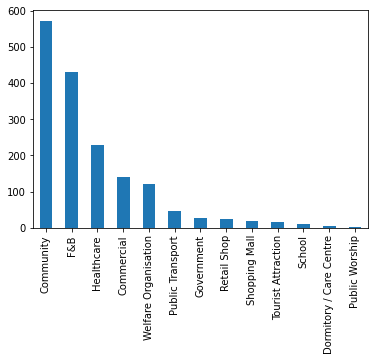

In [155]:
location_type_dist = master['LOCATION_TYPE'].value_counts()
location_type_dist.plot(kind='bar')

In [156]:
# TO EXPAND

#### Task 2: Due to a system error, the location type column for the last 200 rows of the dataset has become garbled. Using all earlier rows as well as all other columns in the dataset, build a classification model to predict the location type for these hotspots. You may treat the three rarest location types as one category.

Location type is very imbalanced, as shown in the graph above. Need to account for this imbalance

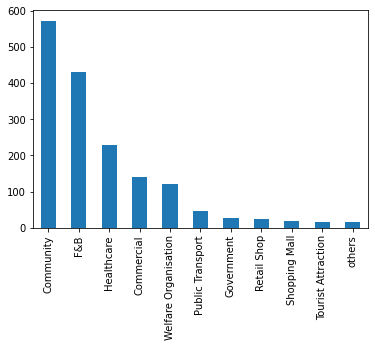

In [157]:
target = 'LOCATION_TYPE'
lump_tgt_n = 3

# lump last 3 together
master[master[target].isin(location_type_dist.tail(lump_tgt_n).index)] = 'others'
master['LOCATION_TYPE'].value_counts().plot(kind='bar')

In [158]:
def split_dataset_target(df,target):
    dataset = df.drop(target,axis=1)
    target = df[target]
    return dataset, target

def split_train_test(df,n):
    length = len(df)
    train_length = length - n
    train = df.loc[:train_length,:]
    test = df.loc[train_length:,:]
    return train, test

In [159]:
train, test = split_train_test(master,200)
print(train.shape)
print(test.shape)

(1442, 9)
(200, 9)


In [160]:
trainx, trainy, = split_dataset_target(train,target)
testx, testy = split_dataset_target(test,target)

In [161]:
# find baseline performance - pick majority class
baseline_acc = (trainy.value_counts().head(1) / sum(trainy.value_counts())).values[0]
print(round(baseline_acc,2))

0.37


As this is a classification problem, one could use all the classifiers possible. But from experience as well as research papers, XGBoost works the best. So in the interest of time, will only do that one

In [162]:
import xgboost as xgb
clf = xgb.XGBClassifier(n_jobs=-1, objective='multi:softmax')
clf.fit(trainx,trainy)

ValueError: DataFrame.dtypes for data must be int, float or bool.
                Did not expect the data types in fields Y, X, LOCATION_NAME, POSTAL_CODE, STREET_ADDRESS, OPERATOR_NAME, INC_CRC, FMEL_UPD_D

#### Task 3: The information has now been recovered from a backup copy of the file. Compared to the true location types, how good was your model? Be prepared to explain the metrics you use to evaluate your model.

As mentioned, its quite an imbalanced problem. Accuracy is less meaningful here if predicting every location type is equally important. --> Use Confusion matrix (precision/recall) and fscores etc.

### Question 4
Task: Help your colleague present the insight in an intuitive manner that is easily understood by a
non-technical audience, and that reflects as many characteristics in the list as possible. Be prepared
to justify any and every aspect of your visualisation (e.g. chart choice, colour palette, labels,
orientation, etc.)